# RandomVector

## Résumé

Dans ce segment, nous présentons la classe `RandomVector`. Nous présentons en particulier le lien et les différences avec la classe `ComposedDistribution`. 

In [1]:
import openturns as ot

## Exercice 1 : une fonction à trois entrées

Définir la fonction myAnalyticalSimulator comme une `SymbolicFunction` implémentant la fonction suivante :
$$
\begin{eqnarray}
Y_1 &=& x_1 + x_2 + x_3 \\
Y_2 &=& x_1 - x_2 x_3
\end{eqnarray}
$$
Comment créer le `RandomVector` associé ?

## Solution de l'exercice 1 : : une fonction à trois entrées

In [2]:
inputDistribution = ot.ComposedDistribution([ot.Normal()]*3)
inputRandomVector = ot.RandomVector(inputDistribution)
myAnalyticalSimulator = ot.SymbolicFunction(["X1","X2","X3"], ["X1+X2+X3","X1-X2*X3"])
outputRandomVector = ot.CompositeRandomVector(myAnalyticalSimulator,inputRandomVector)

## Exercice 2 : quatre conversions

Expérimenter les quatre conversions présentées ci-dessous :`
1. `RandomVector` → `RandomVector`
1. `Distribution` → `Distribution`
1. `Distribution` → `RandomVector`
1. `RandomVector` → `Distribution`

**Questions**
* Quelles sont les conversions possibles ?
* Pourquoi certaines conversions sont elles impossibles ?

## Solution de l'exercice 2 : quatre conversions

1. On peut toujours convertir un RandomVector en RandomVector : facile.

In [3]:
print(ot.RandomVector(inputRandomVector))

class=RandomVector implementation=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[2]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 im

2. On peut toujours convertir une Distribution en Distribution : bien sûr.

In [4]:
print(ot.Distribution(inputDistribution))

ComposedDistribution(Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), IndependentCopula(dimension = 3))


3. On peut toujours convertir une Distribution en RandomVector : puisque la distribution est connue, cette conversion ne pose aucun problème.

In [5]:
print(ot.RandomVector(inputDistribution))

class=RandomVector implementation=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[2]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 im

4. On ne peut pas convertir un RandomVector en ComposedDistribution.

In [6]:
# Décommenter la ligne ci-dessous (génère une exception)
# ot.ComposedDistribution(inputRandomVector)

En effet, la distribution n'est pas connue dans le vecteur aléatoire `inputRandomVector` : il est donc impossible de créer la `ComposedDistribution`. 

## Exercice 3 : composition de RandomVector

On considère la fonction `mySimulator2`.

In [7]:
def mySimulator2 (x):
    y0=x [0]+ x [1]
    y1=x [1]* x [2]
    y=[y0 ,y1]
    return y

Utiliser la classe `RandomVector` pour définir le vecteur aléatoire associé à la composition de la fonction `mySimulator` par la fonction `mySimulator`, c’est à dire `Y=mySimulator2(mySimulator(X))`.

## Solution de l'exercice 3 : composition de RandomVector

On peut composer deux `RandomVector`, c'est à dire en créant une fonction composée. 

In [8]:
def mySimulator (x):
    y0=x [0]+ x[1]+ x[2]
    y1=x[0] -x[1]* x[2]
    y=[y0 ,y1]
    return y

In [9]:
X0 = ot.Normal (0. ,1.)
X1 = ot.Normal (0. ,1.)
X2 = ot.Normal (0. ,1.)
inputDistribution = ot.ComposedDistribution ( ( X0 , X1 , X2 ))
inputRandomVector = ot.RandomVector ( inputDistribution )
myWrapper = ot.PythonFunction (3 ,2 , mySimulator )
outputRandomVector = ot.CompositeRandomVector ( myWrapper , inputRandomVector )

In [10]:
def mySimulator2(x):
    y0=x[0]+x[1]
    y1=x[1]*x[2]
    y=[y0,y1]
    return y

In [11]:
myWrapper2 = ot.PythonFunction(2,2,mySimulator2)
outputRandomVector2=ot.CompositeRandomVector(myWrapper2,outputRandomVector)

## Exercice 4 :  la classe CompositeDistribution

La classe `CompositeDistribution` permet de définir une distribution fondée sur l'application d'une fonction scalaire (de $\mathbb{R}$ dans $\mathbb{R}$) à une distribution unidimensionnelle. 
Considérons $X$ une variable aléatoire de loi $\mathcal{L}_0$ et $G : \mathbb{R} \rightarrow \mathbb{R}$ une fonction. On considère la variable aléatoire $Y$ définie par :
$$
Y=G(X).
$$
On note $\mathcal{L}$ la distribution de la variable $Y$ : la classe `CompositeDistribution` permet de définir la loi de $Y$. 

On considère la variable $X$ de loi uniforme entre 0 et 12. On considère la fonction $G$ définie par :
$$
G(X) = X^2
$$
pour $X\in[0,12]$.

**Questions**
* Définir la variable `distributionX` associée à la loi de la variable $X$. Dessiner la densité de probabilité de la distribution.
* Définir la fonction `maFonc` associée à la fonction $G$. Dessiner la fonction entre 0 et 12.
* Utiliser la classe `CompositeDistribution` pour définir la distribution associée à $Y$. Dessiner cette distribution.

## Solution de l'exercice 4 :  la classe CompositeDistribution

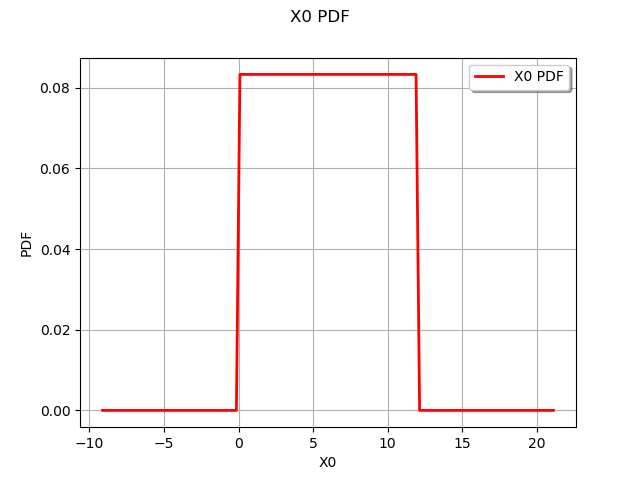

In [12]:
distributionX = ot.Uniform(0,12)
distributionX.drawPDF()

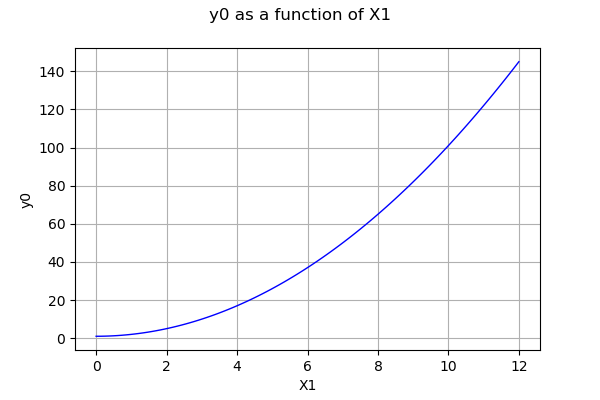

In [13]:
maFonc = ot.SymbolicFunction(["X1"], ["1+X1^2"])
maFonc.draw(0,12,100)

In [14]:
outputDistEx4 = ot.CompositeDistribution(maFonc,distributionX)

Dessine la distribution de $Y$.

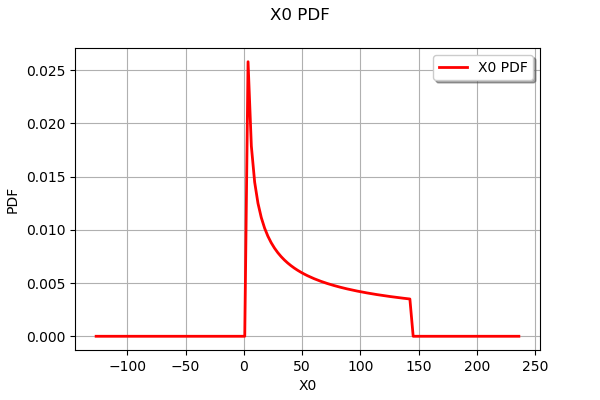

In [15]:
outputDistEx4.drawPDF()